# Deliverable 3 Work:

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# From Deliverable 2 work

def parse_years(filepath, year_range):
    years = {}
    for i in range(year_range[0], year_range[1]):
        years[i] = pd.read_excel(filepath, sheet_name=str(i), engine='openpyxl')
    return years

def entry_past_2000_and_english_speaking(years_dict, year_range, state_code):
    after_2000_idx = 28
    english_ability_idx = 29
    entered_past_2000 = []
    less_than_well_english = []
    yrs = []
    for yr in range(year_range[0], year_range[1]):
        yrs += [yr]
        entered_past_2000 += [years_dict[yr][state_code][after_2000_idx]]
        less_than_well_english += [years_dict[yr][state_code][english_ability_idx]]
        
    new_df = pd.DataFrame({'year': yrs, 'entered_past_2000': entered_past_2000, 'poor_english': less_than_well_english})
    return new_df

def entry_english_education_and_age(years_dict, year_range, state_code):
    """ Here we are going to look at:
            - all brazilians 20 and over
            - brazilians who entered the US before and after 2000
            - if they finished high school
            - their ability to speak enlish is less than very well
        
    """
    
    after_2000_idx = 28
    english_ability_idx = 29
    finish_hs_idx = 31
    over_20_idx_range = (4, 18)
    
    entered_past_2000 = []
    less_than_well_english = []
    over_20 = []
    finished_hs = []
    
    yrs = []
    for yr in range(year_range[0], year_range[1]):
        yrs += [yr]
        entered_past_2000 += [years_dict[yr][state_code][after_2000_idx]]
        less_than_well_english += [years_dict[yr][state_code][english_ability_idx]]
        finished_hs += [years_dict[yr][state_code][finish_hs_idx]]
        over_20 = sum([years_dict[yr][state_code][i] for i in range(*over_20_idx_range)])
        
    new_df = pd.DataFrame({'year': yrs, 'over_20':over_20, 'finished_high_school': finished_hs, 'entered_past_2000': entered_past_2000, 'poor_english': less_than_well_english})
    return new_df

# Deliverable 3, new features combos: Age, Marital Status, Employment by Type, and Education

def education_to_marital_status(years_dict, year_range, state_code):
    lt_hs_idx = 30 # less than high school
    hs_idx = 31 # completed high school
    some_college_idx = 32 # completed assosiate degree or some college
    gte_bachelors_idx = 33 # greater than or equal to a bachelors degree
    
    married_idx = 20
    widowed_idx = 21
    divorced_idx = 22
    seperated_idx = 23
    not_married_or_under_15_idx = 24
    
    yrs = []
    lt_hs = []
    hs = []
    some_college = []
    gte_bachelors = []
    married = []
    widowed = []
    divorced = []
    seperated = []
    not_married_or_under_15 = []
    
    for yr in range(year_range[0], year_range[1]):
        yrs += [yr]
        lt_hs += [years_dict[yr][state_code][lt_hs_idx]]
        hs += [years_dict[yr][state_code][hs_idx]]
        some_college += [years_dict[yr][state_code][some_college_idx]]
        gte_bachelors += [years_dict[yr][state_code][gte_bachelors_idx]]
        married += [years_dict[yr][state_code][married_idx]]
        widowed += [years_dict[yr][state_code][widowed_idx]]
        divorced += [years_dict[yr][state_code][divorced_idx]]
        seperated += [years_dict[yr][state_code][seperated_idx]]
        not_married_or_under_15 += [years_dict[yr][state_code][not_married_or_under_15_idx]]
        
    education_dict = {
        'year': yrs,
        'less_than_high_school': lt_hs,
        'complete_high_school': hs,
        'completed_some_college': some_college,
        'bachelors_degree_or_greater': gte_bachelors
    }
    
    marital_status_dict = {
        'year': yrs,
        'married': married,
        'widowed': widowed,
        'divorced': divorced,
        'seperated': seperated,
        'not_married_or_under_15': not_married_or_under_15
    }
    
    combined_dict = {
        'year': yrs,
        'less_than_high_school': lt_hs,
        'complete_high_school': hs,
        'completed_some_college': some_college,
        'bachelors_degree_or_greater': gte_bachelors,
        'married': married,
        'widowed': widowed,
        'divorced': divorced,
        'seperated': seperated,
        'not_married_or_under_15': not_married_or_under_15
    }
     
    return pd.DataFrame(combined_dict), pd.DataFrame(education_dict), pd.DataFrame(marital_status_dict)

In [3]:
excel_file_path="Brazilian_Immigrants.xlsx"
years = parse_years(excel_file_path, [2006,2020])

In [4]:
df_combined, education, marital = education_to_marital_status(years, [2006, 2020], 25)

In [5]:
df_combined.drop(['year'], axis=1).corr()

,less_than_high_school,complete_high_school,completed_some_college,bachelors_degree_or_greater,married,widowed,divorced,seperated,not_married_or_under_15
less_than_high_school,1.000000,-0.562121,-0.369120,-0.444882,-0.217010,-0.309171,-0.260438,0.054915,0.239198
complete_high_school,-0.562121,1.000000,0.617958,0.367628,0.686574,0.518657,0.192713,-0.006501,0.391309
completed_some_college,-0.369120,0.617958,1.000000,0.466323,0.660565,0.111039,0.507995,0.396024,0.081812
bachelors_degree_or_greater,-0.444882,0.367628,0.466323,1.000000,0.707250,0.293029,0.471243,-0.175053,0.223407
married,-0.217010,0.686574,0.660565,0.707250,1.000000,0.145460,0.210692,-0.194301,0.554087
widowed,-0.309171,0.518657,0.111039,0.293029,0.145460,1.000000,0.426231,0.031721,0.176211
divorced,-0.260438,0.192713,0.507995,0.471243,0.210692,0.426231,1.000000,0.158280,-0.298653
seperated,0.054915,-0.006501,0.396024,-0.175053,-0.194301,0.031721,0.158280,1.000000,-0.226809
not_married_or_under_15,0.239198,0.391309,0.081812,0.223407,0.554087,0.176211,-0.298653,-0.226809,1.000000


Here we can see that some strong candidates for linear regression are completing high school or college, and being married. Lets further investigate this by combining the education columns greater than or equal to a high school education and compare to the number married.

In [6]:
education_marital_status = pd.DataFrame()
# create greater than or equal to a high school education column
education_marital_status['gte_high_school'] = df_combined['complete_high_school'] + \
df_combined['completed_some_college'] + df_combined['bachelors_degree_or_greater']

education_marital_status['married'] = df_combined['married']

In [7]:
education_marital_status.corr()

,gte_high_school,married
gte_high_school,1.000000,0.844688
married,0.844688,1.000000


Now its starting to become very clear that there is a very strong correlation between a decent education (high school or greater) and getting married. Let see how the correlations change when we only include those with some college or greater.

In [8]:
education_marital_status = pd.DataFrame()
# create greater than or equal to some college education column
education_marital_status['gte_some_college'] = df_combined['completed_some_college'] + df_combined['bachelors_degree_or_greater']

education_marital_status['married'] = df_combined['married']

In [9]:
education_marital_status.corr()

,gte_some_college,married
gte_some_college,1.000000,0.799791
married,0.799791,1.000000


It seems that college or not, just having some level of decent education is strongly correlated to being married for the Brazilian population in Massachusetts.

Let continue by trying to predict the number of Brazilians in MA who have completed high school or better by the number that are married.


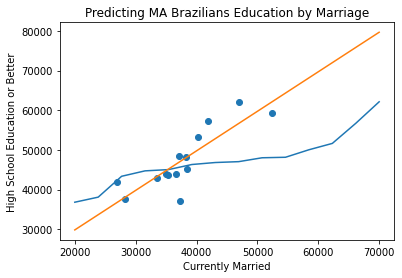

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

education_marital_status = pd.DataFrame()
# create greater than or equal to a high school education column
education_marital_status['gte_high_school'] = df_combined['complete_high_school'] + \
df_combined['completed_some_college'] + df_combined['bachelors_degree_or_greater']

education_marital_status['married'] = df_combined['married']

education_marital_status = education_marital_status.sort_values(by=['married'])

X = np.array(education_marital_status.married).reshape(-1, 1)
y = education_marital_status.gte_high_school

model = LinearRegression().fit(X, y)

xfit = np.linspace(20000, 70000, len(X))
yfit = model.predict(X)

yline = [model.intercept_+x*model.coef_ for x in xfit]

plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.plot(xfit, yline)
plt.title('Predicting MA Brazilians Education by Marriage')
plt.xlabel('Currently Married')
plt.ylabel('High School Education or Better')
plt.show()

In [14]:
model.score(X, y)

0.7134981429881004

Here we can see that as the number of MA brazilians currently married grows, so does the number of MA brazilians who have a high school education or better. This could indicate that Brazilians who are educated have a higher sense of responsibility and as such decide to enter into a formal marriage with a partner.

Now with this information the next logical step would be to predict the growth of married brazilians in mass:

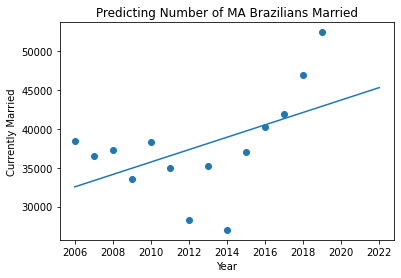

In [15]:
X = np.array(marital.year).reshape(-1, 1)
y = marital.married

model = LinearRegression().fit(X, y)

xfit = np.linspace(2006, 2022, len(X))
yfit = model.predict(X)

yline = [model.intercept_+x*model.coef_ for x in xfit]

plt.scatter(X, y)
# plt.plot(xfit, yfit)
plt.plot(xfit, yline)
plt.title('Predicting Number of MA Brazilians Married')
plt.xlabel('Year')
plt.ylabel('Currently Married')
plt.show()

In [16]:
model.score(X, y)

0.25685722604549033

In [17]:
model.coef_

array([796.82637363])

In [18]:
model.intercept_

-1565894.3626373624

In [94]:
prediction_2020 = model.intercept_ + 2020*model.coef_
prediction_2020

array([43694.91208791])

In [99]:
X = [x[0] for x in X]
list(zip(X, y))

[(2006, 38377.0),
 (2007, 36544.0),
 (2008, 37268.0),
 (2009, 33568.0),
 (2010, 38248.0),
 (2011, 34938.0),
 (2012, 28291.0),
 (2013, 35256.0),
 (2014, 27006.0),
 (2015, 37047.0),
 (2016, 40274.0),
 (2017, 41881.0),
 (2018, 46957.0),
 (2019, 52407.0)]

In [100]:
model.coef_[0]

796.8263736263735

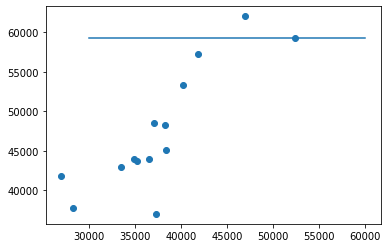

In [60]:
model = LogisticRegression().fit(X, y)

xfit = np.linspace(30000, 60000, len(X))
yfit = model.predict(X)

plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.show()

In [58]:
yfit

array([59280., 59280., 59280., 59280., 59280., 59280., 59280., 59280.,
       59280., 59280., 59280., 59280., 59280., 59280.])

# Deliverable 2 Work:

In [5]:
# James Heilberg
# CS506

# Deliverable 1 Work. Preliminary Analysis and Visualizations

# TODO:
#     Age Categories: 
#         4 functions (combine buckets using sum)
#             1. Parse age categories from just MA
#             2. Parse age categories from entire country using sum aggregation
#             3. Plot change in age since 2006 for just MA (state code 25) using buckets
#             4. Plot change in age since 2006 for entire country using buckets
#         1-2 sentences on how things changed
#     Employement Type:
#         4 functions
#             1. Parse Employement Type from just MA
#             2. Parse Employement Type from entire country using sum aggregation
#             3. Plot change in Employement Type since 2006 for just MA (state code 25)
#             4. Plot change in Employement Type since 2006 for entire country
#         1-2 sentences on how things changed
#     Employment by Occupation:
#         4 functions
#             1. Parse Employment by Occupation from just MA
#             2. PParse Employment by Occupation from entire country using sum aggregation
#             3. List top 5 most common Employment by Occupation for each year since 2006 for just MA (state code 25)
#             4. List top 5 most common Employment by Occupation for each year since 2006 for entire country
#         1-2 sentences on how things changed

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [44]:
excel_file_path="Brazilian_Immigrants.xlsx"
years = {}
for i in range(2006, 2020):
    years[i] = pd.read_excel(excel_file_path, sheet_name=str(i), engine='openpyxl')

In [ ]:
list(years[2010][''])

In [22]:
list(zip(range(len(years[2010]['State Code'])), years[2010]['State Code']))

[(0, 'Population'),
 (1, 'Age 0 to 4'),
 (2, 'Age 05 to 09'),
 (3, 'Age 10 to 19'),
 (4, 'Age 20 to 24'),
 (5, 'Age 25 to 29'),
 (6, 'Age 30 to 34'),
 (7, 'Age 35 to 39'),
 (8, 'Age 40 to 44'),
 (9, 'Age 45 to 49'),
 (10, 'Age 50 to 54'),
 (11, 'Age 55 to 59'),
 (12, 'Age 60 to 64'),
 (13, 'Age 65 to 69'),
 (14, 'Age 70 to 74'),
 (15, 'Age 75 to 79'),
 (16, 'Age 80 to 84'),
 (17, 'Age 85 plus'),
 (18, 'Female'),
 (19, 'Male'),
 (20, 'Married'),
 (21, 'Widowed'),
 (22, 'Divorced'),
 (23, 'Separated'),
 (24, 'Never married or under 15 years old'),
 (25, 'U.S. citizen by naturalization'),
 (26, 'Not a citizen of the U.S.'),
 (27, 'Entered US before 2000'),
 (28, 'Entered US in 2000 or later'),
 (29, 'Speaks English Less Than Very Well'),
 (30, 'Less than high school'),
 (31, 'High School Graduate/GED or Alternative Credential'),
 (32, 'Some College/Associate Degree'),
 (33, 'Bachelors Degree or Higher'),
 (34, 'Males In Civilian Labor Force'),
 (35, 'Females In Civilian Labor Force'),
 (3

In [47]:
def parse_years(filepath, year_range):
    years = {}
    for i in range(year_range[0], year_range[1]):
        years[i] = pd.read_excel(filepath, sheet_name=str(i), engine='openpyxl')
    return years

In [50]:
# year of entry past 2000 vs ability to speak english very well

def entry_past_2000_and_english_speaking(years_dict, year_range, state_code):
    after_2000_idx = 28
    english_ability_idx = 29
    entered_past_2000 = []
    less_than_well_english = []
    yrs = []
    for yr in range(year_range[0], year_range[1]):
        yrs += [yr]
        entered_past_2000 += [years_dict[yr][state_code][after_2000_idx]]
        less_than_well_english += [years_dict[yr][state_code][english_ability_idx]]
        
    new_df = pd.DataFrame({'year': yrs, 'entered_past_2000': entered_past_2000, 'poor_english': less_than_well_english})
    return new_df
        
    

In [55]:
years = parse_years(excel_file_path, [2006,2020])
df = entry_past_2000_and_english_speaking(years, [2006, 2020], 25)

In [58]:
df

,year,entered_past_2000,poor_english
0,2006,45492.0,52820.0
1,2007,44842.0,46778.0
2,2008,44193.0,43099.0
3,2009,42175.0,43843.0
4,2010,47458.0,44389.0
5,2011,42198.0,35581.0
6,2012,32187.0,28988.0
7,2013,38182.0,36220.0
8,2014,38286.0,30968.0
9,2015,38773.0,33953.0


In [57]:
#find correlation
df.entered_past_2000.corr(df.poor_english)

0.8103686105526238

Here we can see a strong positive correlation between brazilians entering Massachussets after 2000 and their ability to speak english well. Since we know from deliverable 1 that the Brazilian population is increasing mostly due to immigrants, this influx of immigrants are not very well versed in english before they enter.

In [62]:
def entry_english_education_and_age(years_dict, year_range, state_code):
    """ Here we are going to look at:
            - all brazilians 20 and over
            - brazilians who entered the US before and after 2000
            - if they finished high school
            - their ability to speak enlish is less than very well
        
    """
    
    after_2000_idx = 28
    english_ability_idx = 29
    finish_hs_idx = 31
    over_20_idx_range = (4, 18)
    
    entered_past_2000 = []
    less_than_well_english = []
    over_20 = []
    finished_hs = []
    
    yrs = []
    for yr in range(year_range[0], year_range[1]):
        yrs += [yr]
        entered_past_2000 += [years_dict[yr][state_code][after_2000_idx]]
        less_than_well_english += [years_dict[yr][state_code][english_ability_idx]]
        finished_hs += [years_dict[yr][state_code][finish_hs_idx]]
        over_20 = sum([years_dict[yr][state_code][i] for i in range(*over_20_idx_range)])
        
    new_df = pd.DataFrame({'year': yrs, 'over_20':over_20, 'finished_high_school': finished_hs, 'entered_past_2000': entered_past_2000, 'poor_english': less_than_well_english})
    return new_df

In [63]:
years = parse_years(excel_file_path, [2006,2020])
df = entry_english_education_and_age(years, [2006, 2020], 25)

In [71]:
df.drop('year', 1).corr()

<ipython-input-71-f9be21eafe64>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('year', 1).corr()


,over_20,finished_high_school,entered_past_2000,poor_english
over_20,NaN,NaN,NaN,NaN
finished_high_school,NaN,1.000000,0.695487,0.550600
entered_past_2000,NaN,0.695487,1.000000,0.810369
poor_english,NaN,0.550600,0.810369,1.000000


We can see in this correlation table that the strongest correlation is in entering past 2000 and the ability to speak english. However, there is also relatively strong correlation ~.7 in entering past 2000 and finishing hs. This means that many immigrant Brazilians who recently entered are not receiving a full education (at least completion of HS).

# Deliverable 1 Work

In [100]:
# AGE FUNCTIONS

# NOTES:
    # maybe reconsider the age groupings

# DATA HANDELING:

def combine_age_to_5_buckets(df, state_code):
    return {
        'Age 0 to 4': df[state_code][1],
        'Age 5 to 19': sum([df[state_code][i] for i in range(2,4)]),
        'Age 20 to 34': sum([df[state_code][i] for i in range(4,7)]),
        'Age 35 to 59': sum([df[state_code][i] for i in range(7,12)]),
        'Age 59 plus': sum([df[state_code][i] for i in range(12,18)])
    }

def get_ages_by_year(years_dict, state_code):
    ages_dict = {}
    for yr in years_dict.keys():
        ages_dict[yr] = combine_age_to_5_buckets(years_dict[yr], state_code)
    return ages_dict

def get_ages_entire_country(years_dict):
    ages_dict_by_state = {}
    for state in range(1, 79):
        try:
            ages_dict_by_state[state] = get_ages_by_year(years_dict, state)
        except:
            pass
        
#     # remove states missing years
#     for state in ages_dict_by_state.keys():
#         print(list(ages_dict_by_state[state].keys()))
#         print(list(range(year_range[0], year_range[1])))
#         if list(ages_dict_by_state[state].keys()) != list(range(year_range[0], year_range[1])):
#             print(state)
#             del ages_dict_by_state[state]
    
    return ages_dict_by_state

def get_ages_entire_country_aggregated(years_dict):
    entire = get_ages_entire_country(years_dict)
    new_dict = {}
    for state in entire.keys():
        for year in entire[state].keys():
            if year not in new_dict:
                new_dict[year] = entire[state][year]
            else:
                # update each bucket to aggregate
                buckets = list(new_dict[year].keys())
                for bucket in buckets:
                    new_dict[year][bucket] += entire[state][year][bucket]
    return new_dict
        

# DATA VISUALIZATION

def visualise_ma_change_in_ages(full_country_ages_by_year_by_state_dict):
    ma_state_code = 25
    ma = full_country_ages_by_year_by_state_dict[25]
    x = list(ma.keys())
    buckets = list(ma[x[0]].keys())
    b0 = [ma[yr][buckets[0]] for yr in x]
    b1 = [ma[yr][buckets[1]] for yr in x]
    b2 = [ma[yr][buckets[2]] for yr in x]
    b3 = [ma[yr][buckets[3]] for yr in x]
    b4 = [ma[yr][buckets[4]] for yr in x]
    
    # plot lines
    plt.plot(x, b0, label = buckets[0])
    plt.plot(x, b1, label = buckets[1])
    plt.plot(x, b2, label = buckets[2])
    plt.plot(x, b3, label = buckets[3])
    plt.plot(x, b4, label = buckets[4])
    plt.title("Change in Massachusetts Brazilian Population Age")
    plt.xlabel("Year")
    plt.ylabel("Number of people")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt.show()

def visualise_usa_change_in_ages(full_country_ages_by_year_aggregated):
    usa = full_country_ages_by_year_aggregated
    x = list(usa.keys())
    buckets = list(usa[x[0]].keys())
    b0 = [usa[yr][buckets[0]] for yr in x]
    b1 = [usa[yr][buckets[1]] for yr in x]
    b2 = [usa[yr][buckets[2]] for yr in x]
    b3 = [usa[yr][buckets[3]] for yr in x]
    b4 = [usa[yr][buckets[4]] for yr in x]
    
    # plot lines
    plt.plot(x, b0, label = buckets[0])
    plt.plot(x, b1, label = buckets[1])
    plt.plot(x, b2, label = buckets[2])
    plt.plot(x, b3, label = buckets[3])
    plt.plot(x, b4, label = buckets[4])
    plt.title("Change in US Brazilian Population Age")
    plt.xlabel("Year")
    plt.ylabel("Number of people")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt.show()

In [98]:
years = parse_years(excel_file_path, [2006, 2020])
full_country_ages_by_year_by_state = get_ages_entire_country(years) # query using x[state][year][age_bucket]
full_country_ages_by_year_aggregated = get_ages_entire_country_aggregated(years)

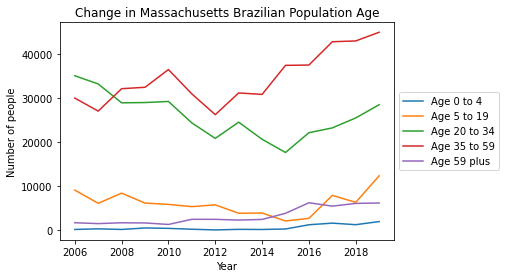

In [94]:
visualise_ma_change_in_ages(full_country_ages_by_year_by_state)

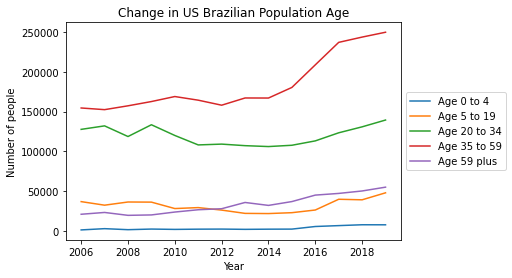

In [101]:
visualise_usa_change_in_ages(full_country_ages_by_year_aggregated)

**Analysis:**

Even though the number of years in each aggregation is different, we can clearly see that the number of middle aged and younger middle aged brazilians in MA and the entire USA grows at a rate larger thatn the number of newly born Brazilians aged 0-4. This could indicate that there is a larger immigration rate or entry of Brazilians after their youth (ages 0-19).

In [139]:
# Employement Type Functions (colums = range(38,42))

def employment_type_to_dict(df, state_code):
    new_dict = {}
    buckets = ['Private Wage and Salary Workers',
               'Government Workers',
               'Self employed Not incorporated',
               'Self employed Incorporated']
    for i in range(38,42):
        new_dict[buckets[i-38]] = df[state_code][i] 
    return new_dict

def get_employement_type_by_year(years_dict, state_code):
    et_dict = {}
    for yr in years_dict.keys():
        et_dict[yr] = employment_type_to_dict(years_dict[yr], state_code)
    return et_dict

def get_employement_type_entire_country(years_dict):
    et_dict_by_state = {}
    for state in range(1, 79):
        try:
            et_dict_by_state[state] = get_employement_type_by_year(years_dict, state)
        except:
            pass
        
    return et_dict_by_state

def get_employement_type_entire_country_aggregated(years_dict):
    entire = get_employement_type_entire_country(years_dict)
    new_dict = {}
    for state in entire.keys():
        for year in entire[state].keys():
            if year not in new_dict:
                new_dict[year] = entire[state][year]
            else:
                # update each bucket to aggregate
                buckets = list(new_dict[year].keys())
                for bucket in buckets:
                    new_dict[year][bucket] += entire[state][year][bucket]
    return new_dict

# DATA VISUALIZATION

def visualise_ma_change_in_employment_type(full_country_employment_type_by_year_by_state_dict):
    ma_state_code = 25
    ma = full_country_employment_type_by_year_by_state_dict[25]
    x = list(ma.keys())
    buckets = list(ma[x[0]].keys())
    b0 = [ma[yr][buckets[0]] for yr in x]
    b1 = [ma[yr][buckets[1]] for yr in x]
    b2 = [ma[yr][buckets[2]] for yr in x]
    b3 = [ma[yr][buckets[3]] for yr in x]
    
    # plot lines
    plt.plot(x, b0, label = buckets[0])
    plt.plot(x, b1, label = buckets[1])
    plt.plot(x, b2, label = buckets[2])
    plt.plot(x, b3, label = buckets[3])
    plt.title("Change in Massachusetts Brazilian Population Employment Type")
    plt.xlabel("Year")
    plt.ylabel("Number of people")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt.show()

def visualise_usa_change_employment_type(full_country_employment_type_by_year_aggregated):
    usa = full_country_employment_type_by_year_aggregated
    x = list(usa.keys())
    buckets = list(usa[x[0]].keys())
    b0 = [usa[yr][buckets[0]] for yr in x]
    b1 = [usa[yr][buckets[1]] for yr in x]
    b2 = [usa[yr][buckets[2]] for yr in x]
    b3 = [usa[yr][buckets[3]] for yr in x]
    
    # plot lines
    plt.plot(x, b0, label = buckets[0])
    plt.plot(x, b1, label = buckets[1])
    plt.plot(x, b2, label = buckets[2])
    plt.plot(x, b3, label = buckets[3])
    plt.title("Change in US Brazilian Population Employment Type")
    plt.xlabel("Year")
    plt.ylabel("Number of people")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt.show()

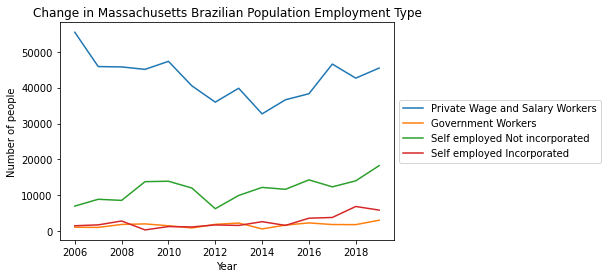

In [140]:
visualise_ma_change_in_employment_type(get_employement_type_entire_country(years))

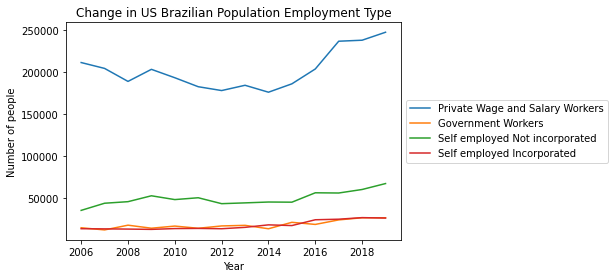

In [141]:
 visualise_usa_change_employment_type(get_employement_type_entire_country_aggregated(years))

**Analysis:**

We can clearly see that while country wide, the Brazilians working for salery in private sector has grown, in MA specifically that number has declined. Instead, growth in Non-incorporated self-employment which is mostly freelance work has increased significantly. The number of public jobs and incorpoated.

In [166]:
# EMPLOYMENT BY OCCUPATION FUNCTIONS (rows: range(56-66)):
def employment_occupation_to_dict(df, state_code):
    new_dict = {}
    buckets = ['Management & Professional',
               'Services',
               'Sales and Office',
               'Construction and Extracion',
               'Maintenance and Repair',
               'Production, Transportation and Material Moving',
               'Educational Instruction and Library Occupations',
               'Arts, Design, Entertainment, Sports, and Media Occupations',
               'Healthcare Practitioner and Technical Occupations',
               'Other']
    for i in range(56, 66):
        new_dict[buckets[i-56]] = df[state_code][i] 
    return new_dict

def get_employement_occupation_by_year(years_dict, state_code):
    eo_dict = {}
    for yr in years_dict.keys():
        eo_dict[yr] = employment_occupation_to_dict(years_dict[yr], state_code)
    return eo_dict

def get_employement_occupation_entire_country(years_dict):
    eo_dict_by_state = {}
    for state in range(1, 79):
        try:
            eo_dict_by_state[state] = get_employement_occupation_by_year(years_dict, state)
        except:
            pass
        
    return eo_dict_by_state

def get_employement_occupation_entire_country_aggregated(years_dict):
    entire = get_employement_occupation_entire_country(years_dict)
    new_dict = {}
    for state in entire.keys():
        for year in entire[state].keys():
            if year not in new_dict:
                new_dict[year] = entire[state][year]
            else:
                # update each bucket to aggregate
                buckets = list(new_dict[year].keys())
                for bucket in buckets:
                    new_dict[year][bucket] += entire[state][year][bucket]
    return new_dict

# DATA VISUALIZATION

def visualise_ma_change_in_employment_occupation(full_country_employment_occupation_by_year_by_state_dict):
    ma_state_code = 25
    ma = full_country_employment_occupation_by_year_by_state_dict[25]
    x = list(ma.keys())
    buckets = list(ma[x[0]].keys())
    b0 = [ma[yr][buckets[0]] for yr in x]
    b1 = [ma[yr][buckets[1]] for yr in x]
    b2 = [ma[yr][buckets[2]] for yr in x]
    b3 = [ma[yr][buckets[3]] for yr in x]
    b4 = [ma[yr][buckets[4]] for yr in x]
    b5 = [ma[yr][buckets[5]] for yr in x]
    b6 = [ma[yr][buckets[6]] for yr in x]
    b7 = [ma[yr][buckets[7]] for yr in x]
    b8 = [ma[yr][buckets[8]] for yr in x]
    b9 = [ma[yr][buckets[9]] for yr in x]
    
    # plot lines
    plt.plot(x, b0, label = buckets[0])
    plt.plot(x, b1, label = buckets[1])
    plt.plot(x, b2, label = buckets[2])
    plt.plot(x, b3, label = buckets[3])
    plt.plot(x, b4, label = buckets[4])
    plt.plot(x, b5, label = buckets[5])
    plt.plot(x, b6, label = buckets[6])
    plt.plot(x, b7, label = buckets[7])
    plt.plot(x, b8, label = buckets[8])
    plt.plot(x, b9, label = buckets[9])
    plt.title("Change in Massachusetts Brazilian Population Employment Occupation")
    plt.xlabel("Year")
    plt.ylabel("Number of people")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt.show()

def visualise_usa_change_employment_occupation(full_country_employment_occupation_by_year_aggregated):
    usa = full_country_employment_occupation_by_year_aggregated
    x = list(usa.keys())
    buckets = list(usa[x[0]].keys())
    b0 = [usa[yr][buckets[0]] for yr in x]
    b1 = [usa[yr][buckets[1]] for yr in x]
    b2 = [usa[yr][buckets[2]] for yr in x]
    b3 = [usa[yr][buckets[3]] for yr in x]
    b4 = [usa[yr][buckets[4]] for yr in x]
    b5 = [usa[yr][buckets[5]] for yr in x]
    b6 = [usa[yr][buckets[6]] for yr in x]
    b7 = [usa[yr][buckets[7]] for yr in x]
    b8 = [usa[yr][buckets[8]] for yr in x]
    b9 = [usa[yr][buckets[9]] for yr in x]
    
    # plot lines
    plt.plot(x, b0, label = buckets[0])
    plt.plot(x, b1, label = buckets[1])
    plt.plot(x, b2, label = buckets[2])
    plt.plot(x, b3, label = buckets[3])
    plt.plot(x, b4, label = buckets[4])
    plt.plot(x, b5, label = buckets[5])
    plt.plot(x, b6, label = buckets[6])
    plt.plot(x, b7, label = buckets[7])
    plt.plot(x, b8, label = buckets[8])
    plt.plot(x, b9, label = buckets[9])
    plt.title("Change in US Brazilian Population Employment Occupation")
    plt.xlabel("Year")
    plt.ylabel("Number of people")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return plt.show()

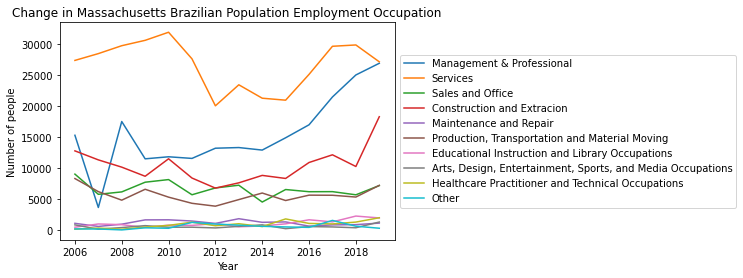

In [168]:
visualise_ma_change_in_employment_occupation(get_employement_occupation_entire_country(years))

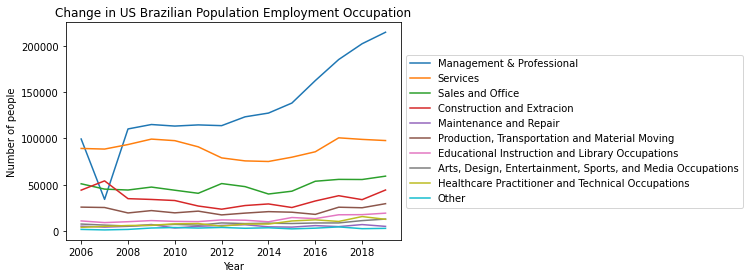

In [169]:
visualise_usa_change_employment_occupation(get_employement_occupation_entire_country_aggregated(years))

**Analysis**

Over the years, there is a clear trend that Brazilians are choosing more Management & Professional (M&P) jobs. In Mass specifically, 2019 represents the point that M&P begins to overtake service jobs. On the country wide scale this happended in back in 2008, but it is clear that MA Brazilians are catching up to the trend.